# Plotting Euler angles on a pole figure


We want to take 3 euler angles and use them to turn the lattice basis vectors into a matrix of vectors in the sample reference frame. I think that this is just given by:

$$A=I \, G$$

## Orientation matrix from euler angles 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The function below creates an orientation matrix from (Bunge) Euler angles. By default it produces a matrix using the passive interpretation of the rotation, in which the reference frame is rotated. This is the usual convention used to represent crystallographic orientations. Using a passive rotation, the relationship between the sample reference frame, $C_S$ and the crystal reference frame, $C_C$ is given by the matrix multiplication:

$$C_C=G\,C_S$$

The inverse operation is given by:

$$C_S=G^{-1}\,C_C$$ which for the orientation matrix is equivalent to: $$C_S=G^{T}\,C_C$$

In [2]:
def ori_matrix_de_Graef(phi1,Phi,phi2,passive=True):
    phi1=np.radians(phi1)
    Phi=np.radians(Phi)
    phi2=np.radians(phi2)
    
    R11 =   np.cos(phi1)*np.cos(phi2)-np.sin(phi1)*np.cos(Phi)*np.sin(phi2)
    R12 =   np.sin(phi1)*np.sin(phi2)+np.cos(phi1)*np.cos(Phi)*np.sin(phi2)
    R13 =   np.sin(Phi)*np.sin(phi2)
    
    R21 = - np.cos(phi1)*np.sin(phi2) - np.sin(phi1)*np.cos(Phi)*np.cos(phi2)
    R22 = - np.sin(phi1)*np.sin(phi2) + np.cos(phi1)*np.cos(Phi)*np.cos(phi2)
    R23 =   np.sin(Phi)*np.cos(phi2)
    
    R31 =   np.sin(phi1)*np.sin(Phi)
    R32 = - np.cos(phi1)*np.sin(Phi)
    R33 =   np.cos(Phi)
    
    matrix=np.matrix([[R11,R12,R13],[R21,R22,R23],[R31,R32,R33]])
    if not passive: # matrix above is for the passive rotation 
        matrix=matrix.transpose()
    return matrix

In [3]:
def ori_matrix(phi1,Phi,phi2,passive=True):
    phi1=np.radians(phi1)
    Phi=np.radians(Phi)
    phi2=np.radians(phi2)
    R11 = np.cos(phi1)*np.cos(phi2)-np.sin(phi1)*np.cos(Phi)*np.sin(phi2)
    R12 = np.sin(phi1)*np.cos(phi2)+ np.cos(phi1)*np.cos(Phi)*np.sin(phi2)
    R13 = np.sin(phi2)*np.sin(Phi)
    R21 = -np.cos(phi1)*np.sin(phi2)-np.sin(phi1)*np.cos(Phi)*np.cos(phi2)
    R22 = - np.sin(phi1)*np.sin(phi2)+np.cos(phi1)*np.cos(Phi)*np.cos(phi2)
    R23 = np.cos(phi2)*np.sin(Phi)
    R31 = np.sin(phi1)*np.sin(Phi)
    R32= -np.sin(Phi)*np.cos(phi1)
    R33= np.cos(Phi)
    matrix=np.matrix([[R11,R12,R13],[R21,R22,R23],[R31,R32,R33]])
    if not passive: # matrix above is for the passive rotation 
        matrix=matrix.transpose()
    return matrix

In [4]:
g_ori = ori_matrix(54,108,43)
g_dg = ori_matrix_de_Graef(54,108,43)
print(g_ori)
print(g_dg)

[[ 0.60037851  0.46780237  0.64861898]
 [-0.21803015 -0.68458816  0.6955587 ]
 [ 0.76942088 -0.55901699 -0.30901699]]
[[ 0.60037851  0.42787306  0.64861898]
 [-0.21803015 -0.68458816  0.6955587 ]
 [ 0.76942088 -0.55901699 -0.30901699]]


In [5]:
g_ori

matrix([[ 0.60037851,  0.46780237,  0.64861898],
        [-0.21803015, -0.68458816,  0.6955587 ],
        [ 0.76942088, -0.55901699, -0.30901699]])

In [6]:
np.linalg.inv(g_ori)

matrix([[ 0.60037851, -0.21803015,  0.76942088],
        [ 0.46780237, -0.68458816, -0.55901699],
        [ 0.64861898,  0.6955587 , -0.30901699]])

In [7]:
np.isclose(np.linalg.inv(g_ori), g_ori.T)

matrix([[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]])

# Plotting on a pole figure

Given an orientation matrix $G$, different poles can be plotted by transforming the crystal vectors into sample coordinates and then plotting them. This means using:

$$C_S=G^{-1}\,C_C$$


This section is from the documentation for [orilib](https://sourceforge.net/projects/orilib/) by Roman Key.

If $\left(hkl\right)$ is the pole of interest and
$n=\sqrt{h^2+k^2+l^2}$, $\alpha$ and
$\beta$ are given by,


$$
\left(\matrix{
    \sin \alpha \cos \beta \cr
    \sin \alpha \sin \beta \cr
    \cos \alpha \cr
}\right)
=
1/n
\left(\matrix{
g_{11} & g_{21} & g_{31} \cr
g_{12} & g_{22} & g_{32} \cr
g_{13} & g_{23} & g_{33} \cr
}\right)
\left(\matrix{
    h \cr
    k \cr
    l \cr
}\right)
$$


Then, $P$ is projected onto the equatorial plane,
${X_s}-{Y_s}$. The position of the
projection point, $math$, can be described by polar coordinates
$\left(Op, \beta\right)$.

- The stereographic projection is commonly used in metallurgy since angular relationships in the crystal are preserved in the projection.  ${p}$ is the point of intersection of segment $[PS]$ with the projection plane. ${Op}$ is given by,

$$
Op = \tan \left(\alpha / 2\right)
$$


- The equal-area projection is commonly used in geology. Areas are preserved in the projection, so it is particularly appropriate for the measurements of population densities.  $Op$ is given by,


$$
Op = \sqrt{2} \sin \left(\alpha / 2\right)
$$



In [8]:
def get_proj(g,pole,proj='stereo'):
    n=np.linalg.norm(pole)
    pole=np.matrix(pole).T/n
    vector=g.T*pole #invert matrix
    alpha=np.arccos(vector[2])
    # print(vector[2])
    if np.isclose(alpha,0.0):
        beta=np.matrix([0.0])
    else:
        beta=np.arctan2(vector[1]/np.sin(alpha),vector[0]/np.sin(alpha))
    #beta1=np.arccos(vector[0][0]/np.sin(alpha))
    #beta2=np.arcsin(vector[1][0]/np.sin(alpha))
    
    if alpha>np.pi/2:
        alpha = np.pi-alpha
        beta += np.pi
    
    if proj=='stereo':
        Op=np.tan(alpha/2)
    if proj=='equal area':
        Op=np.sqrt(2)*np.sin(alpha/2)
    else:
        exit
    return Op, beta,vector

In [9]:
def plot_poles(beta_list, Op_list):
    fig = plt.figure(1)
    ax = fig.add_subplot(111, projection='polar')
    for beta, Op in zip(beta_list, Op_list):
        ax.plot(beta, Op,'o',ms=18, alpha=0.5)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_ylim([0,1.0])

In [10]:
def get_vectors(g,pole_list, proj='stereo'):
    Op_list=[]
    beta_list=[]
    vector_list=[]
    
    for pole in pole_list:
        Op,beta,vector=get_proj(g,pole,proj)
   #     if vector[-1]>0:
        Op_list.append(Op)
        beta_list.append(beta)
        vector_list.append(vector)
    
    return Op_list, beta_list, vector_list

In [11]:
def get_pole_list(pole='001'):
    pole_dict = {
        '001': [np.array([1,0,0]), np.array([0,1,0]),np.array([0,0,1]),
               np.array([-1,0,0]), np.array([0,-1,0]),np.array([0,0,-1])],
        '110': [np.array([1,1,0]), np.array([1,0,1]),np.array([0,1,1]),
               np.array([-1,-1,0]), np.array([-1,0,-1]),np.array([0,-1,-1]),
               np.array([-1,1,0]), np.array([-1,0,1]),np.array([0,-1,1]),
               np.array([1,-1,0]), np.array([1,0,-1]),np.array([0,1,-1])],
        '111': [np.array([1,1,1]), np.array([-1,1,1]),np.array([1,-1,1]), np.array([1,1,-1]),
               np.array([-1,-1,-1]), np.array([-1,-1,1]),np.array([1,-1,-1]), np.array([-1,1,-1])]
    }
    pole_list=pole_dict[pole]
    return pole_list

def make_vectors(hkl_indices=[1.0,1.0,2.0,-2.0,-1.0]):
    vecs=[]
    vecs_list=[]
    perm = permutations(hkl_indices,3)
    for p in perm:
        a = np.abs(np.array(p))
        u , c = np.unique(a, return_counts=True)
        for i,n  in zip(u,c):
            if i==2:
                if n !=2:
                    vecs.append(p)
    for vec1 in vecs:
        for vec2 in vecs:
            if (vec1 != vec2 and np.dot(vec1,vec2)!=0):
                vecs_list.append(vec2)            
    return [np.array(vec) for vec in set(vecs_list)]

def get_twin_axis_old(axis='111'):
    axis_dict = {
        '111': [np.array([1,1,1]), np.array([-1,1,1]),np.array([1,-1,1]), np.array([1,1,-1]),
               np.array([-1,-1,-1]), np.array([-1,-1,1]),np.array([1,-1,-1]), np.array([-1,1,-1])],
        '112': [np.array([1,1,2]), np.array([-1,1,2]),np.array([1,-1,2]), np.array([1,1,-2]),
               np.array([1,2,1]), np.array([-1,2,1]),np.array([1,-2,1]), np.array([1,2,-1]),
               np.array([2,1,1]), np.array([-2,1,1]),np.array([2,-1,1]), np.array([2,1,-1])],
        '001': [np.array([1,0,0]), np.array([0,1,0]),np.array([0,0,1]),
               np.array([-1,0,0]), np.array([0,-1,0]),np.array([0,0,-1])]
    }
    axis_list=axis_dict[axis]
    return axis_list

def get_twin_axis(axis='112'):
    vecs=make_vectors()
    return vecs

In [12]:
def plot_pole(g, pole='001', legend=False):
    pole_list=get_pole_list(pole)
    Op_list, beta_list, vector_list=get_vectors(g,pole_list)
    plot_poles(beta_list, Op_list)
    if legend:
        plt.legend(pole_list,bbox_to_anchor=(1.5, 1.05))
    #return beta_list, Op_list
    
def plot_all_poles(g, proj= 'stereo', fig = None):
    poles=['001','110','111']
    if fig == None:
        fig = plt.figure(figsize=(10,30))
    for n, pole in enumerate(poles):
        pole_list=get_pole_list(pole)
        Op_list, beta_list, vector_list=get_vectors(g,pole_list,proj)
        ax = fig.add_subplot(1,3,n+1, projection='polar')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_ylim([0,1.0])
        ax.set_title(pole)
        for beta, Op in zip(beta_list, Op_list):
            ax.plot(beta, Op,'ro',ms=12, alpha=0.5)

def plot_all_poles_multi(g_list, proj= 'stereo', fig = None ):
    poles=['001','110','111']
    if fig == None:
        fig = plt.figure(figsize=(10,30))
    pole_figures=[]
    for n, pole in enumerate(poles): 
        ax = fig.add_subplot(1,3,n+1, projection='polar')
        pole_figures.append(ax)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_ylim([0,1.0])
        ax.set_title(pole)
    for g in g_list:
        for pole_figure, pole in zip(pole_figures,poles):
            pole_list=get_pole_list(pole)
            Op_list, beta_list, vector_list=get_vectors(g,pole_list,proj)
            for beta, Op in zip(beta_list, Op_list):
                pole_figure.plot(beta, Op,'go',ms=12, alpha=0.2)
    

In [13]:
g=ori_matrix(0,20,0)

In [14]:
print(g)

[[ 1.          0.          0.        ]
 [-0.          0.93969262  0.34202014]
 [ 0.         -0.34202014  0.93969262]]


/home/joao/miniconda3/envs/py3/lib/python3.6/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


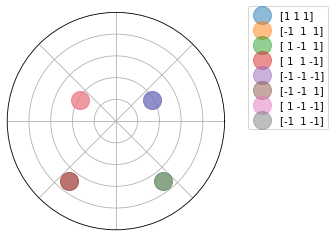

In [15]:
plot_pole(g,'111',legend=True)

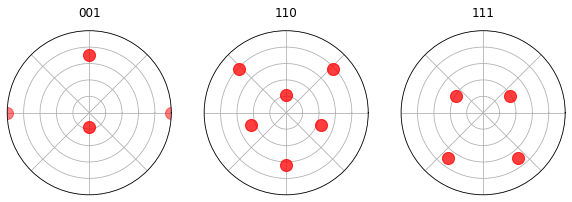

In [16]:
plot_all_poles(g,proj='stereo')

## Twins in in-situ test

In [17]:
g1=ori_matrix(204.48,36.6,12.67)
g2=ori_matrix(239.8,4.06, 80.23)
g3=ori_matrix(99.97,31.59,68.26)
g4= ori_matrix(171,44.24, 8.45)


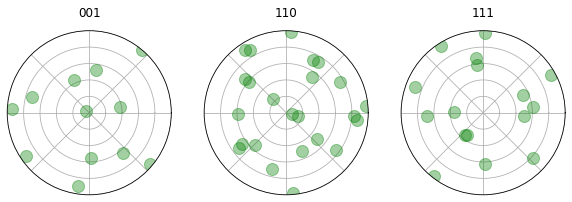

In [18]:
plot_all_poles_multi([g1,g2,g3,g4], proj= 'equal area')

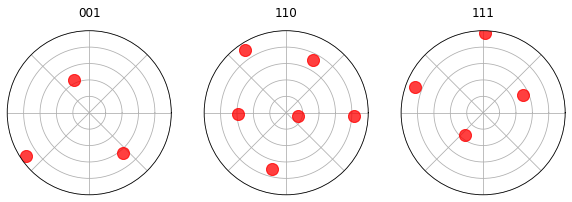

In [19]:
plot_all_poles(g1,proj='equal area')

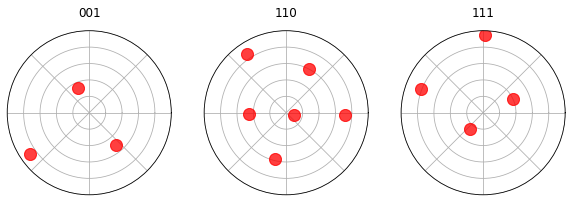

In [20]:
plot_all_poles(g1,proj='stereo')

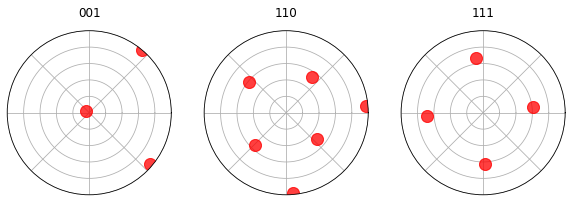

In [21]:
plot_all_poles(g2,proj='equal area')

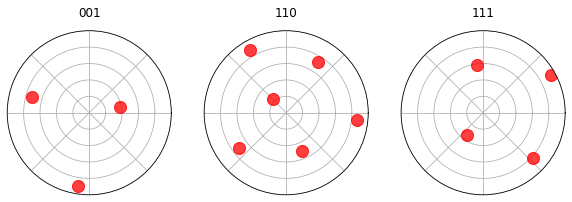

In [22]:
plot_all_poles(g3,proj='equal area')

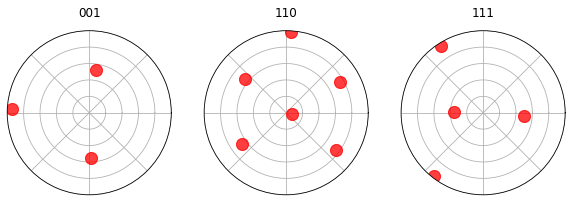

In [23]:
plot_all_poles(g4,proj='equal area')

# Applying a rotation around an axis

Using the passive interpretation of rotation, a rotation about an axis is given by (again from orilib docs):

$$
\left\{\matrix{
g_{11} =r_1 r_1 \left(1-\cos\theta\right) + \hfill \phantom{r_1}  \cos\theta \cr
g_{12} =r_1 r_2 \left(1-\cos\theta\right) + \hfill r_3 \sin\theta \cr
g_{13} =r_1 r_3 \left(1-\cos\theta\right) - \hfill r_2 \sin\theta \cr
g_{21} =r_2 r_1 \left(1-\cos\theta\right) - \hfill r_3 \sin\theta \cr
g_{22} =r_2 r_2 \left(1-\cos\theta\right) + \hfill \phantom{r_1}  \cos\theta \cr
g_{23} =r_2 r_3 \left(1-\cos\theta\right) + \hfill r_1 \sin\theta \cr
g_{31} =r_3 r_1 \left(1-\cos\theta\right) + \hfill r_2 \sin\theta \cr
g_{32} =r_3 r_2 \left(1-\cos\theta\right) - \hfill r_1 \sin\theta \cr
g_{33} =r_3 r_3 \left(1-\cos\theta\right) + \hfill \phantom{r_1}  \cos\theta \cr
}\right.
$$

In [24]:
def g_from_aa(theta, axis, passive = True):
    #theta=np.radians(theta)
    #n=np.linalg.norm(axis)
    #axis=np.array(axis).T/n

    r1=np.squeeze(np.array(axis[0]))
    r2=np.squeeze(np.array(axis[1]))
    r3=np.squeeze(np.array(axis[2]))
    
    
    R11= r1*r1*(1 - np.cos(theta)) +    np.cos(theta)
    R12= r1*r2*(1 - np.cos(theta)) + r3*np.sin(theta)
    R13= r1*r3*(1 - np.cos(theta)) - r2*np.sin(theta)
    R21= r2*r1*(1 - np.cos(theta)) - r3*np.sin(theta)
    R22= r2*r2*(1 - np.cos(theta)) +    np.cos(theta)
    R23= r2*r3*(1 - np.cos(theta)) + r1*np.sin(theta)
    R31= r3*r1*(1 - np.cos(theta)) + r2*np.sin(theta)
    R32= r3*r2*(1 - np.cos(theta)) - r1*np.sin(theta)
    R33= r3*r3*(1 - np.cos(theta)) +    np.cos(theta)
    
    matrix=np.matrix([[R11,R12,R13],[R21,R22,R23],[R31,R32,R33]])
    
    if not passive:
        matrix=matrix.transpose()
        print('Active matrix')
    return matrix

In [25]:
theta1=180
axis1=[1/np.sqrt(6),1/np.sqrt(6),2/np.sqrt(6)]

In [26]:
theta2=60
axis2=[1/np.sqrt(3),1/np.sqrt(3),1/np.sqrt(3)]

In [27]:
theta3=10
axis3=[1/np.sqrt(3),1/np.sqrt(3),1/np.sqrt(3)]

In [28]:
g_twin3=g_from_aa(theta3, axis3)

[[-0.30160865  0.47482183  0.82678682]
 [ 0.82678682 -0.30160865  0.47482183]
 [ 0.47482183  0.82678682 -0.30160865]]


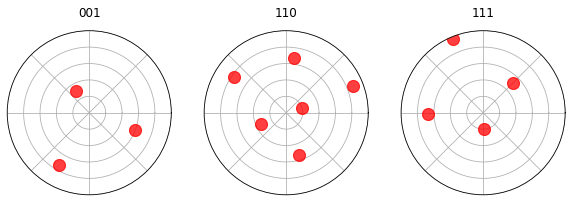

In [29]:
g_twin2=g_from_aa(theta2, axis2)
print(g_twin2)
plot_all_poles(g_twin2,proj='stereo')

In [30]:
def g_twins(g,theta, axis):
    axis_list=get_twin_axis(axis)
    twin_variants={}
    for axis in axis_list:
        axis_norm=normalize(axis)
        sample_axis=g.T*axis_norm
        g_twin=g_from_aa(theta, sample_axis)
        g_final=g*g_twin
        twin_variants[str(axis)]=g_final
    return twin_variants


def normalize(vector):
    norm=np.linalg.norm(vector)
    unit_vector=np.matrix(vector).T/norm
    return unit_vector

In [31]:
def plot_variants(g, theta=180.0, axis = '112', proj='equal area'):
    plot_all_poles(g)
    variants=g_twins(g, theta, axis)
    plot_all_poles_multi(list(variants.values()))  
    return variants

def plot_variants_double(g, proj='equal area'):
    plot_all_poles(g)
    variants=g_double_twins(g,180.0, '112')
    plot_all_poles_multi(list(variants.values()))  
    return variants

In [32]:
g=ori_matrix(0,0,0)

Take the first vector from the list:

In [33]:
from itertools import permutations

In [34]:
vecs=make_vectors()

In [35]:
print(vecs)

[array([ 1., -1.,  2.]), array([1., 2., 1.]), array([ 1.,  1., -2.]), array([ 2., -1.,  1.]), array([-1.,  2.,  1.]), array([-2.,  1.,  1.]), array([ 1., -2., -1.]), array([ 1., -1., -2.]), array([-2., -1.,  1.]), array([2., 1., 1.]), array([-1., -2.,  1.]), array([1., 1., 2.]), array([ 2.,  1., -1.]), array([-1.,  1.,  2.]), array([ 1., -2.,  1.]), array([-2.,  1., -1.]), array([-1.,  1., -2.]), array([ 1.,  2., -1.])]


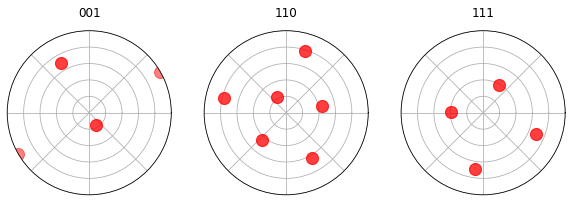

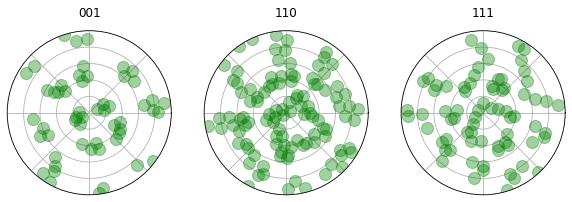

In [36]:
g=ori_matrix(30,20,0)
variants=plot_variants(g, proj='equal_area')

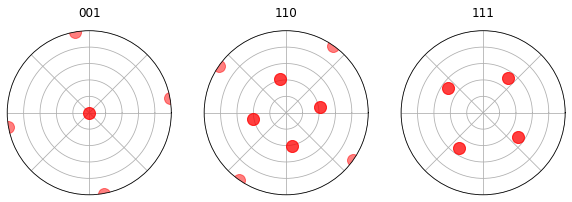

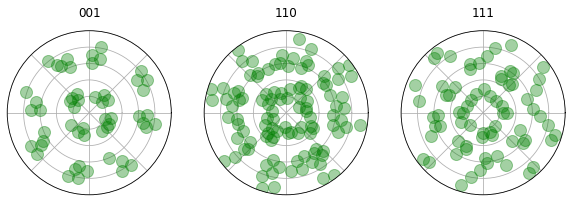

In [37]:
g=ori_matrix(10,0,0)
variants=plot_variants(g, proj='stereo')

# Twinning the Michael Atkinson way

In [38]:
from quat import Quat

In [39]:
def twinOrientation(parentOri, axis, angle = 60.0):
    """Calculates twin orientation quaternion from parent orientation quaternion
        by rotating about axis by angle"""
    twinRot = Quat.fromAxisAngle(axis, np.radians(angle))
    twinOri = twinRot * parentOri
    return twinOri

In [55]:
def euler_to_quat(phi1,Phi,phi2):
    """Takes euler angles in degrees and returns quaternion"""
    parent_eulers = np.radians(np.array((phi1, Phi, phi2)))
    ori_quat = Quat(*parent_eulers)
    return ori_quat

In [56]:
parent_ori=euler_to_quat(10.0,0.0,0.0)
twin_axis=np.array([1,1,1])
twinOriCalc = twinOrientation(parent_ori,twin_axis)
euler= np.degrees(twinOriCalc.eulerAngles())

In [57]:
print(euler)

[216.56505118  48.1896851  116.56505118]


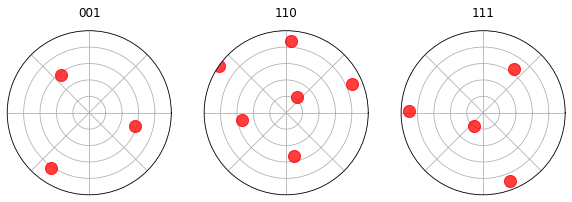

In [58]:
g=ori_matrix(euler[0],euler[1],euler[2])
plot_all_poles(g,proj='equal area')

In [81]:
def twin_ori(phi1, Phi, phi2):
    axis_list=get_pole_list('111')
    parent_ori=euler_to_quat(phi1,Phi,phi2)
    g_list=[]
    euler_list=[]
    for twin_axis in axis_list:
        twinOriCalc = twinOrientation(parent_ori,twin_axis)
        euler= np.degrees(twinOriCalc.eulerAngles())
        euler_list.append(euler)
        g=ori_matrix(euler[0],euler[1],euler[2])
        g_list.append(g)
        # plt.figure()
        # plot_all_poles(g,proj='equal area')    
    return g_list, euler_list

In [84]:
g_list, euler_list = twin_ori(10.0, 0.0, 0.0)

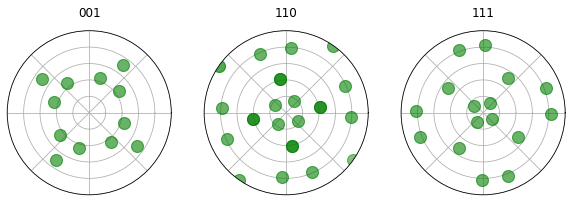

In [85]:
plot_all_poles_multi(g_list)

## Double twinning

In [90]:
euler_list3 = []
g_list3 = []
for euler in euler_list:
    phi1 = euler[0]
    Phi = euler[1]
    phi2 = euler[2]
    g_list2, euler_list2 = twin_ori(phi1, Phi, phi2)
    #euler_list3 = euler_list3+euler_list2
    g_list3 = g_list3+g_list2

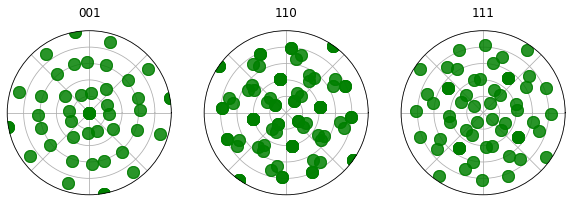

In [91]:
plot_all_poles_multi(g_list3)

## Twinning functions (not working)

In [57]:
def get_twin_ma(euler):
    twin_variants={}
    parentEulers = np.array((euler[0], euler[1], euler[2]))/180*np.pi
    parentOri = Quat(*parentEulers)
    axis_list=get_twin_axis_old('112')
    twin_variants={}
    for axis in axis_list:
        angle = 180
        twinOriCalc = twinOrientation(parentOri, axis=axis, angle=angle)
        euler= twinOriCalc.eulerAngles()*180/np.pi
        twin_variants[str(axis)]=ori_matrix(euler[0], euler[1], euler[2])
        
    return twin_variants
        

In [60]:
def get_double_twin_ma(euler):
    twin_variants={}
    parentEulers = np.array((euler[0], euler[1], euler[2]))/180*np.pi
    parentOri = Quat(*parentEulers)
    axis_list=get_twin_axis_old('111')
    print(axis_list)
    twin_variants={}
    double_twin_variants={}
    for axis1 in axis_list:
        angle = 60
        twinOriCalc = twinOrientation(parentOri, axis=axis1, angle=angle)
        euler_1 = twinOriCalc.eulerAngles()*180/np.pi
        variant_1 = ori_matrix(euler_1[0], euler_1[1], euler_1[2])
        twin_variants[str(axis1)]=variant_1
        for axis2 in axis_list:
            angle = 180
            parentOri = Quat(*euler_1)
            twinOriCalc = twinOrientation(parentOri, axis=axis2, angle=angle)
            euler_2= twinOriCalc.eulerAngles()*180/np.pi
            variant_2 = ori_matrix(euler_2[0], euler_2[1], euler_2[2])*180/np.pi
        double_twin_variants[str(axis1)+str(axis2)]=variant_2    
    return twin_variants, double_twin_variants

In [61]:
euler1=[0,0,0]
euler2=[30,0,0]

In [62]:
twin_matrices=get_twin_ma(euler)

In [63]:
def plot_variants_ma(euler, proj='equal area',fig = None):
    if fig ==None:
        fig = plt.figure(figsize=(10,30))
    g=ori_matrix(euler[0], euler[1], euler[2])
    plot_all_poles(g, fig=fig)
    variants=get_twin_ma(euler)
    plot_all_poles_multi(list(variants.values()),fig=fig)  
    return variants

In [64]:
euler1=[0,0,0]
tw_var, d_tw_var=get_double_twin_ma(euler1)

[array([1, 1, 1]), array([-1,  1,  1]), array([ 1, -1,  1]), array([ 1,  1, -1]), array([-1, -1, -1]), array([-1, -1,  1]), array([ 1, -1, -1]), array([-1,  1, -1])]


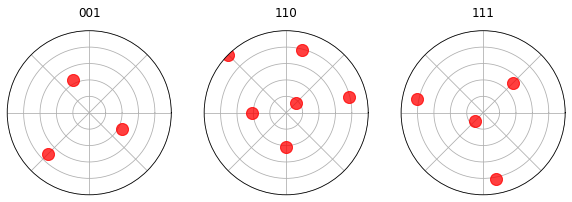

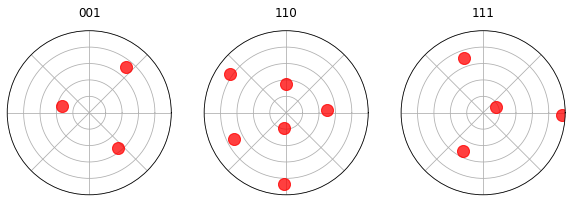

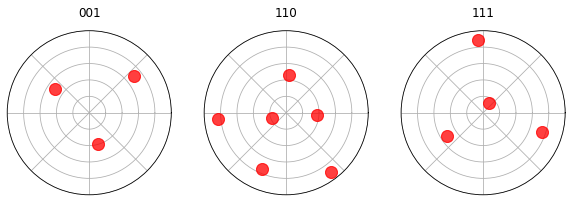

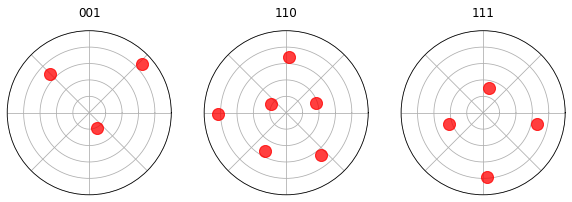

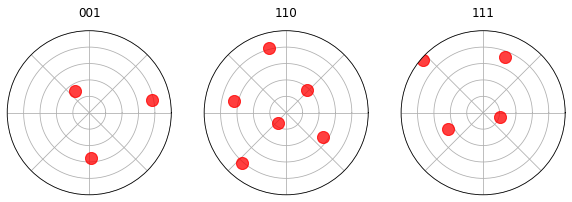

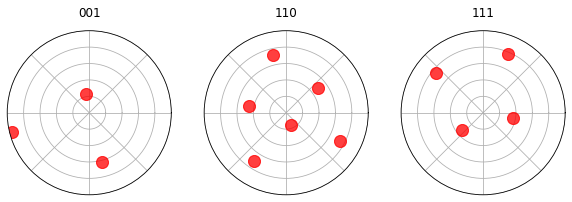

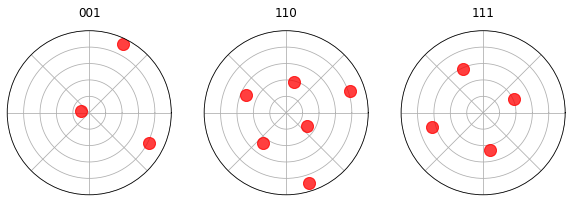

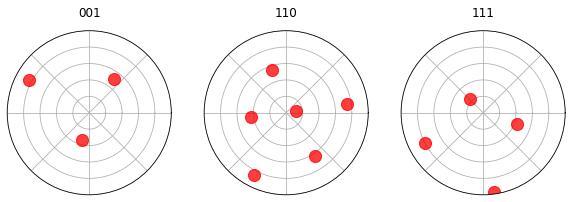

In [65]:
for g in tw_var.values():
    plot_all_poles(g,proj='stereo')

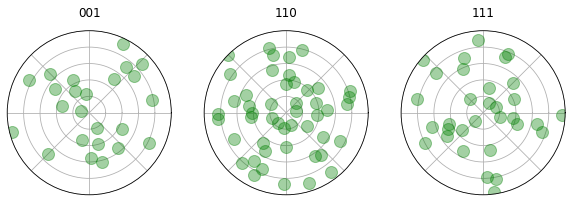

In [66]:
plot_all_poles_multi(tw_var.values())